# Rede Não Direcionada


> **Closeness centrality** mede o quão "perto" um nó está de todos os outros na
rede.
Ou seja, ela mostra a rapidez com que um nó pode alcançar todos os outros nós.

>É como perguntar:
👉 "Se essa pessoa quisesse mandar uma mensagem para todo mundo, ela conseguiria fazer isso rápido?"

---



> **Eigenvector** **centrality**

> A **centralidade do vetor próprio** mede a importância de um nó, considerando a ***importância de seus vizinhos***. Por exemplo, um nó com 300 amigos relativamente impopulares no Facebook teria uma centralidade do vetor próprio menor do que alguém com 300 amigos muito populares (como Barack Obama).


---




> **BFS**

> O BFS pode ser usado tanto em redes direcionadas quanto em redes não direcionadas. A principal funcionalidade do BFS é encontrar o caminho mais curto entre dois nós, e essa característica se aplica a ambos os tipos de grafos, desde que as arestas tenham pesos iguais (ou não ponderadas).

---



 **Algoritmo de Dijkstra**

> O **Algoritmo de Dijkstra** é usado para encontrar o caminho mais curto entre dois pontos em uma rede, onde as arestas têm pesos (custos) não negativos. Ele é comumente utilizado em diversas aplicações, desde roteamento em redes de comunicação até sistemas de navegação.
Funcionamento:
1. Início:
O algoritmo começa com um nó de origem e atribui distância zero a ele. Todos os outros nós recebem distância infinita.
2. Exploração:
O algoritmo explora os nós com menor distância conhecida, um de cada vez, até que o destino seja alcançado ou todos os nós tenham sido explorados.
3. Atualização:
Para cada vizinho de um nó explorado, a distância até esse vizinho é atualizada se o caminho encontrado por meio do nó explorado for mais curto que a distância conhecida.
4. Repetição:
O processo de exploração e atualização é repetido até que o destino seja alcançado ou todos os nós tenham sido explorados.


---









In [ ]:
#imports
from heapq import heapify, heappop, heappush
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
#Creating the class "Node"
class Node:
  def __init__(self, id):
    self.id = id
    self.neighbors = {}
    self.bfs = ()

  def add_neighbor(self, neighbor_id, weight=1):
    self.neighbors[neighbor_id] = weight;

  def bfs_sets(self, distance, pred):
    self.bfs += (distance,pred)

  def degree(self):
    return len(self.neighbors)

  def __repr__(self):  # For unambiguous representation
    return f"Node(id={self.id}, neighbors={self.neighbors})"


In [ ]:
#Creating a class for an undirected network
class UndirectedNetwork:
  def __init__(self):
    self.nodes = {}

  def add_node(self, node):
    self.nodes[node.id] = node

  # def add_link(self, node1_id, node2_id): #for directed links/networks do not use this
  #   if node1_id not in self.nodes:
  #     self.add_node(Node(node1_id))
  #   if node2_id not in self.nodes:
  #     self.add_node(Node(node2_id))
  #   self.nodes[node1_id].add_neighbor(node2_id)
  #   self.nodes[node2_id].add_neighbor(node1_id)

  def add_link(self, node, list_neighbors):
    for neighbor in list_neighbors:
      if neighbor not in self.nodes[node].neighbors and node not in self.nodes[neighbor].neighbors:
        self.nodes[node].add_neighbor(neighbor)
        self.nodes[neighbor].add_neighbor(node)

  def get_node(self,node):
    if node in self.nodes:
      return self.nodes[node]
    return None

  def get_density(self):
    quant_nodes = len(self.nodes)

    potential_links = (quant_nodes*(quant_nodes-1))/2

    actual_links = 0
    for node in self.nodes.values():
      neighbors = node.neighbors
      actual_links += len(neighbors)
    actual_links /= 2
    density = actual_links/potential_links
    return(density)

  def bfs(self, start_node):
    queue = [start_node]
    visited = []

    while queue:
      node = queue.pop(0) #remove the first element from the queue and return it

      if node not in visited:
        visited.append(node)
        print(node, end=" ")

        for neighbor in self.nodes[node].neighbors:
          if neighbor not in visited:
            queue.append(neighbor)

  def dfs(self, start_node):
    stack = [start_node]
    visited = []

    while stack:
      node = stack.pop(0)

      if node not in visited:
        visited.append(node)
        print(node, end=' ')

      for neighbor in self.nodes[node].neighbors:
        if neighbor not in visited:
          stack.insert(0, neighbor)



  def max_degree(self):
    max_node = None
    max_degree = 0

    for node_id, node in self.nodes.items():
      if len(node.neighbors) > max_degree:
        max_node = node_id
        max_degree = len(node.neighbors)
    print(f"Nó com maior grau: {max_node}")
    print(f"Valor do grau: {max_degree}")


  def dijkstra(self, source):
    distances = {node_id: float('inf') for node_id in self.nodes}
    distances[source] = 0
    predecessors = {}
    predecessors[source] = None

    pq = [(0,source)] #priority queue - an normal array, but the tuples have an extra value to represent the priority of elements - the smallest the value, the higher the priority
    heapify(pq)

    visited = set() #set - doesn't allow duplicates and is disordered

    while pq:
      current_distance, current_node = heappop(pq)

      if current_node not in visited:

        visited.add(current_node)

        for neighbor_id, weight in self.nodes[current_node].neighbors.items():
            new_distance = current_distance + weight
            if new_distance < distances[neighbor_id]:
                distances[neighbor_id] = new_distance
                heappush(pq, (new_distance, neighbor_id))
                predecessors[neighbor_id] = current_node

    return distances, predecessors

  def shortest_path(self,source,target):
    x, predecessors = self.dijkstra(source)

    current_node = target
    path = []

    while current_node != None:
      path.append(current_node)
      current_node = predecessors[current_node]
    path.reverse()
    return path

  def betweenness(self, node):
    paths_with_node = 0
    path = []

    quant_nodes = len(self.nodes)
    shortest_paths = ((quant_nodes-1)*(quant_nodes-2))/2 #this paths don't include the chosen node as target or source

    for i in self.nodes:
      for j in self.nodes:
        if i != node and j != node and i != j:
          path = self.shortest_path(i,j)
          if node in path:
            paths_with_node += 1

    paths_with_node /= 2

    betweenness = paths_with_node/shortest_paths
    return betweenness

  def closeness(self, node):
    shortest_distances = 0

    distances, x = self.dijkstra(node)

    for n, distance in distances.items():
      shortest_distances += distance

    quant_nodes = len(self.nodes)

    closeness = (quant_nodes-1)/shortest_distances
    return closeness


In [ ]:
def centralityMeasures(graph):
  degree = nx.degree_centrality(graph)
  betweenness = nx.betweenness_centrality(graph)
  closeness = nx.closeness_centrality(graph)
  eigenvector = nx.eigenvector_centrality(graph, max_iter=500)

  degree_values = [degree[node] for node in graph.nodes]
  bet_values = [betweenness[node] for node in graph.nodes]
  clos_values = [closeness[node] for node in graph.nodes]
  eigen_values = [eigenvector[node] for node in graph.nodes]

  return degree_values, bet_values, clos_values, eigen_values;

In [ ]:
def drawGraph(graph, degree_values, bet_values, clos_values, eigen_values, pos):
    plt.figure(figsize=(20, 10))

    subax1 = plt.subplot(221)
    subax1.set_title("Grau")
    nx.draw(graph, pos, with_labels=False, node_color=degree_values, cmap=plt.cm.Blues, edge_color='gray', node_size=500, edgecolors='black')

    subax2 = plt.subplot(222)
    subax2.set_title("Intermediação")
    nx.draw(graph, pos, with_labels=False, node_color=bet_values, cmap=plt.cm.Blues, edge_color='gray', node_size=500, edgecolors='black')

    subax3 = plt.subplot(223)
    subax3.set_title("Proximidade")
    nx.draw(graph, pos, with_labels=False, node_color=clos_values, cmap=plt.cm.Blues, edge_color='gray', node_size=500, edgecolors='black')

    subax3 = plt.subplot(224)
    subax3.set_title("Eigenvector")
    nx.draw(graph, pos, with_labels=False, node_color=eigen_values, cmap=plt.cm.Blues, edge_color='gray', node_size=500, edgecolors='black')

In [ ]:
network = UndirectedNetwork()

network.add_node(Node("A"))
network.add_node(Node('B'))
network.add_node(Node('C'))
network.add_node(Node('D'))
network.add_node(Node("E"))
network.add_node(Node("F"))

network.add_link('A',['B',"C",'D',"E",'F'])
network.add_link('B',['C','D','E','F'])
network.add_link('D',['C','E','F'])

distances, predecessors = network.dijkstra('E')
print(predecessors)
print(distances)
network.closeness('D')

{'E': None, 'A': 'E', 'B': 'E', 'D': 'E', 'C': 'A', 'F': 'A'}
{'A': 1, 'B': 1, 'C': 2, 'D': 1, 'E': 0, 'F': 2}


1.0



# Colormaps


```
# nx.draw(G, node_color=centrality_values, cmap=plt.cm.Blues)

```

O NetworkX vai:

1. Pegar a lista centrality_values → que são números de centralidade (normalmente entre 0 e 1).

2. Passar cada valor para o colormap → que devolve uma cor específica.

3. Desenhar cada nó com essa cor.







In [ ]:
import networkx as nx

# Criação de uma rede não direcionada
G = nx.Graph()

# Adicionando os nós
G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")
G.add_node("E")
G.add_node("F")

# Adicionando as ligações (arestas)
G.add_edge("A", "B")
G.add_edge("B", "C")
G.add_edge("B", "D")
G.add_edge("D", "E")
G.add_edge("D", "F")

# Calculando o grau de cada nó
degree = dict(G.degree())
print(f"Grau dos nós: {degree}")

# Calculando a centralidade de proximidade (closeness) de cada nó
closeness = nx.closeness_centrality(G)
print(f"Centralidade de proximidade dos nós: {closeness}")

# Calculando a centralidade de intermediação (betweenness) do nó 'B'
betweenness = nx.betweenness_centrality(G)
print(f"Centralidade de intermediação do nó 'B': {betweenness}")

Grau dos nós: {'A': 1, 'B': 3, 'C': 1, 'D': 3, 'E': 1, 'F': 1}
Centralidade de proximidade dos nós: {'A': 0.45454545454545453, 'B': 0.7142857142857143, 'C': 0.45454545454545453, 'D': 0.7142857142857143, 'E': 0.45454545454545453, 'F': 0.45454545454545453}
Centralidade de intermediação do nó 'B': {'A': 0.0, 'B': 0.7000000000000001, 'C': 0.0, 'D': 0.7000000000000001, 'E': 0.0, 'F': 0.0}


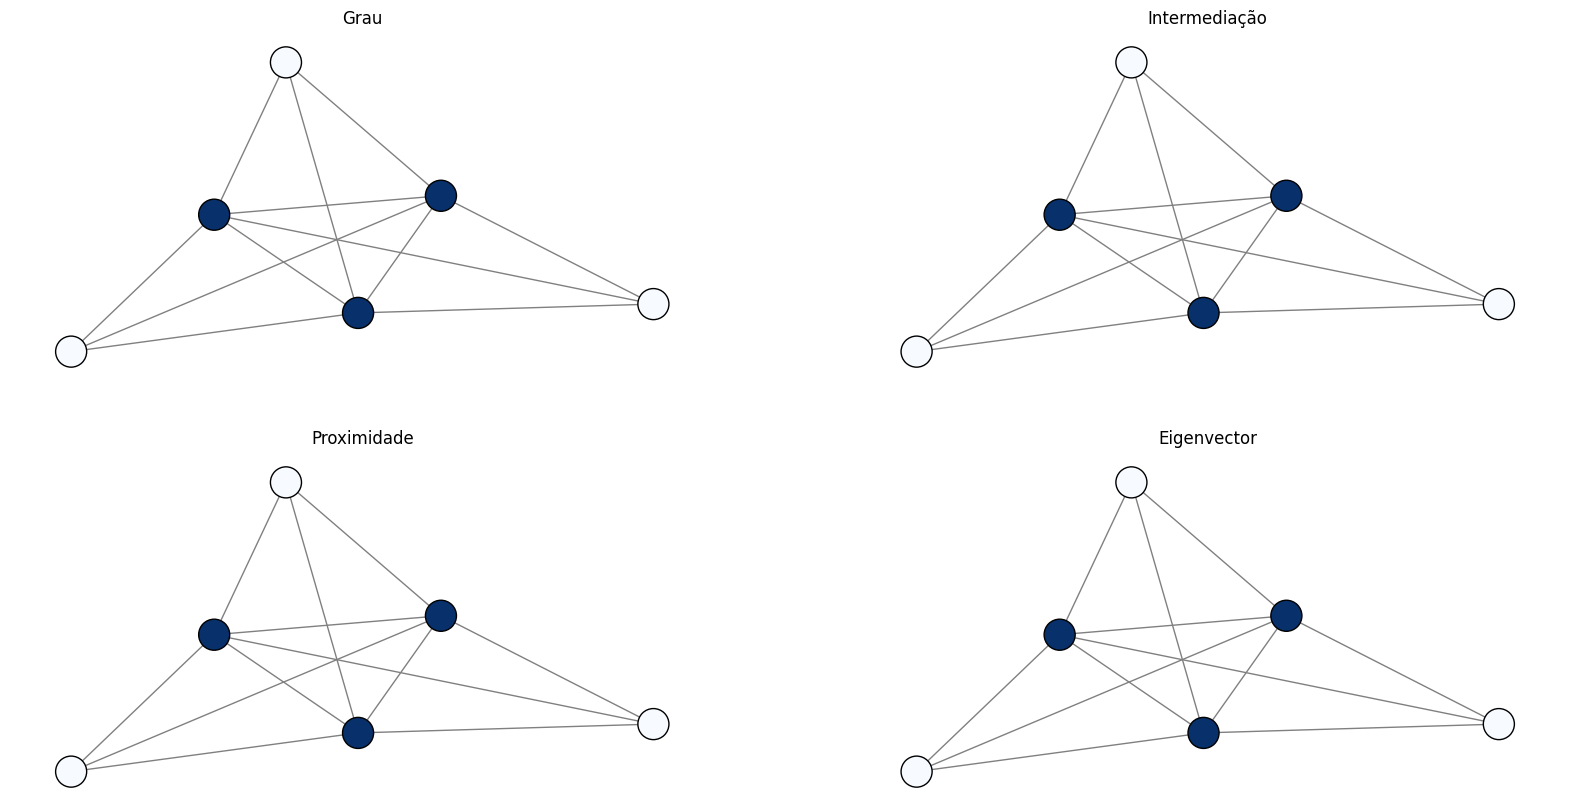

In [ ]:
graph = nx.Graph()
for node_id, node in network.nodes.items():
  graph.add_node(node_id)
  for neighbor in node.neighbors:
    graph.add_edge(node_id, neighbor)
pos = nx.spring_layout(graph, seed=44)

degree_values, bet_values, clos_values, eigen_values = centralityMeasures(graph);
drawGraph(graph, degree_values, bet_values, clos_values, eigen_values, pos)


<Figure size 1500x500 with 0 Axes>

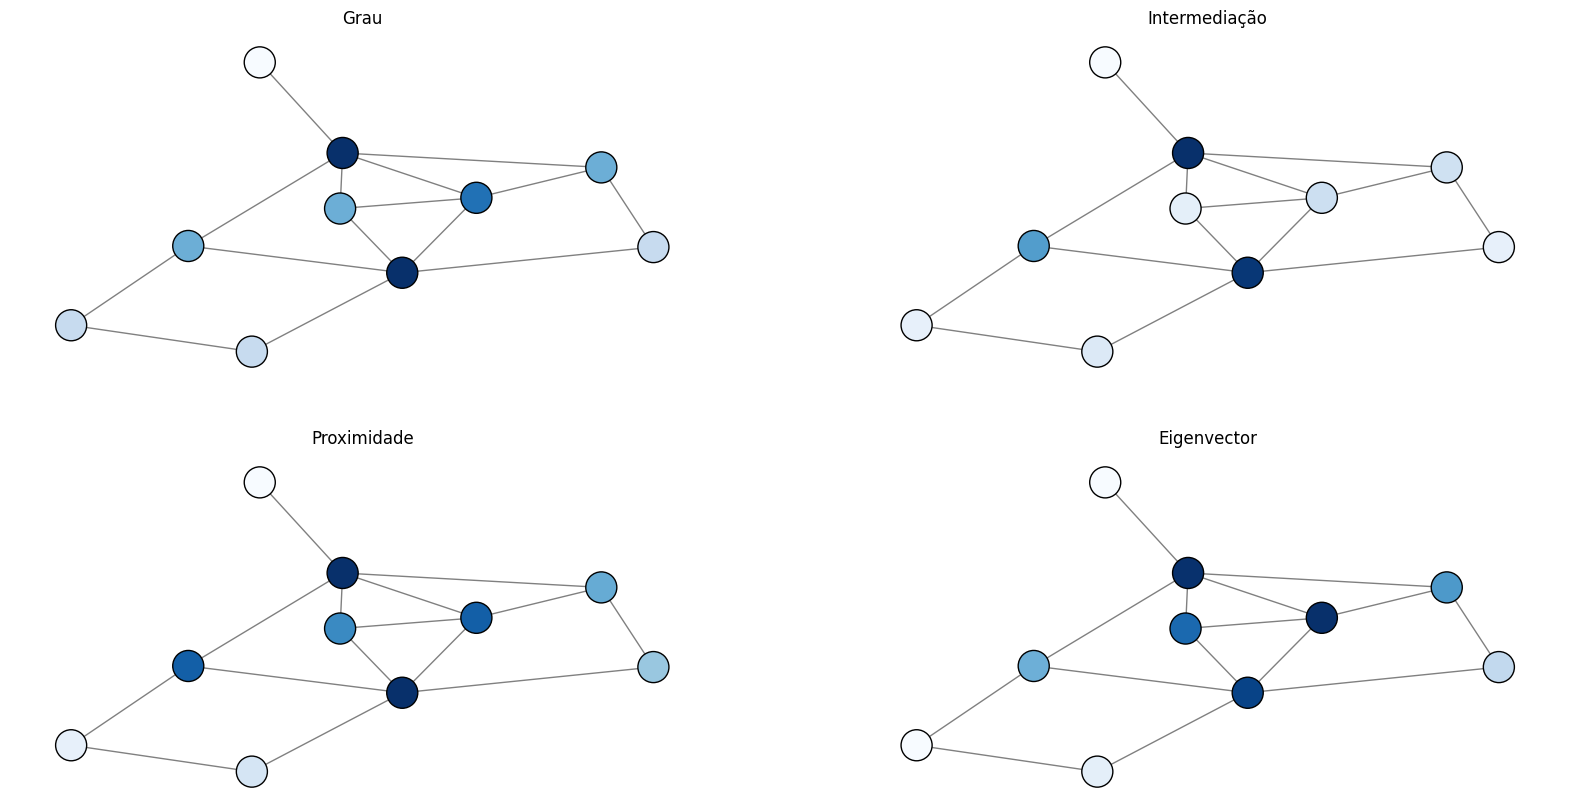

In [ ]:
G2 = nx.Graph();

for node in range(10):
  G2.add_node(node)

G2.add_edge(0,2)
G2.add_edge(2,1)
G2.add_edge(3,4)
G2.add_edge(1,5)
G2.add_edge(6,9)
G2.add_edge(0,3)
G2.add_edge(9,8)
G2.add_edge(5,8)
G2.add_edge(4,9)
G2.add_edge(6,1)
G2.add_edge(7,2)
G2.add_edge(2,5)
G2.add_edge(2,6)
G2.add_edge(8,9)
G2.add_edge(9,0)
G2.add_edge(1,9)

plt.figure(figsize=(15, 5))
pos = nx.spring_layout(G2, seed=44)


degree_values, bet_values, clos_values, eigen_values = centralityMeasures(G2);
drawGraph(G2, degree_values, bet_values, clos_values, eigen_values, pos);


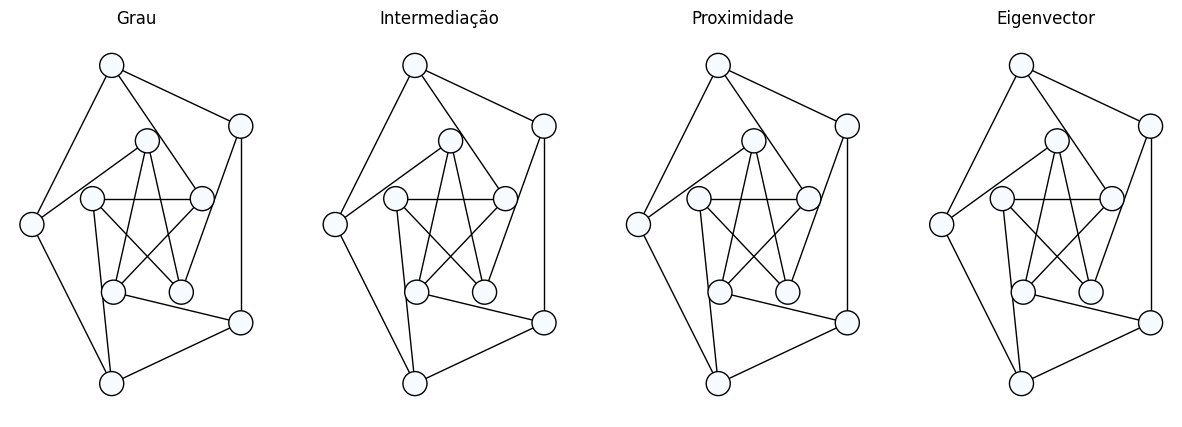

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def centralityMeasures(graph):
  degree = nx.degree_centrality(graph)
  betweenness = nx.betweenness_centrality(graph)
  closeness = nx.closeness_centrality(graph)
  eigenvector = nx.eigenvector_centrality(graph, max_iter=500)

  degree_values = [degree[node] for node in graph.nodes]
  bet_values = [betweenness[node] for node in graph.nodes]
  clos_values = [closeness[node] for node in graph.nodes]
  eigen_values = [eigenvector[node] for node in graph.nodes]

  return degree_values, bet_values, clos_values, eigen_values;

G3 = nx.petersen_graph()

degree_values, bet_values, clos_values, eigen_values = centralityMeasures(G3);

plt.figure(figsize=(15, 5))

subax1 = plt.subplot(141)
subax1.set_title("Grau")
nx.draw_shell(G3, nlist=[range(5, 10), range(5)], node_color=degree_values, cmap=plt.cm.Blues, with_labels=False, font_weight='bold', edgecolors='black')

subax2 = plt.subplot(142)
subax2.set_title("Intermediação")
nx.draw_shell(G3, nlist=[range(5, 10), range(5)], node_color=bet_values, cmap=plt.cm.Blues, with_labels=False, font_weight='bold', edgecolors='black')

subax3 = plt.subplot(143)
subax3.set_title("Proximidade")
nx.draw_shell(G3, nlist=[range(5, 10), range(5)],node_color=clos_values, cmap=plt.cm.Blues, with_labels=False, font_weight='bold', edgecolors='black')

subax3 = plt.subplot(144)
subax3.set_title("Eigenvector")
nx.draw_shell(G3, nlist=[range(5, 10), range(5)],node_color=clos_values, cmap=plt.cm.Blues, with_labels=False, font_weight='bold', edgecolors='black')

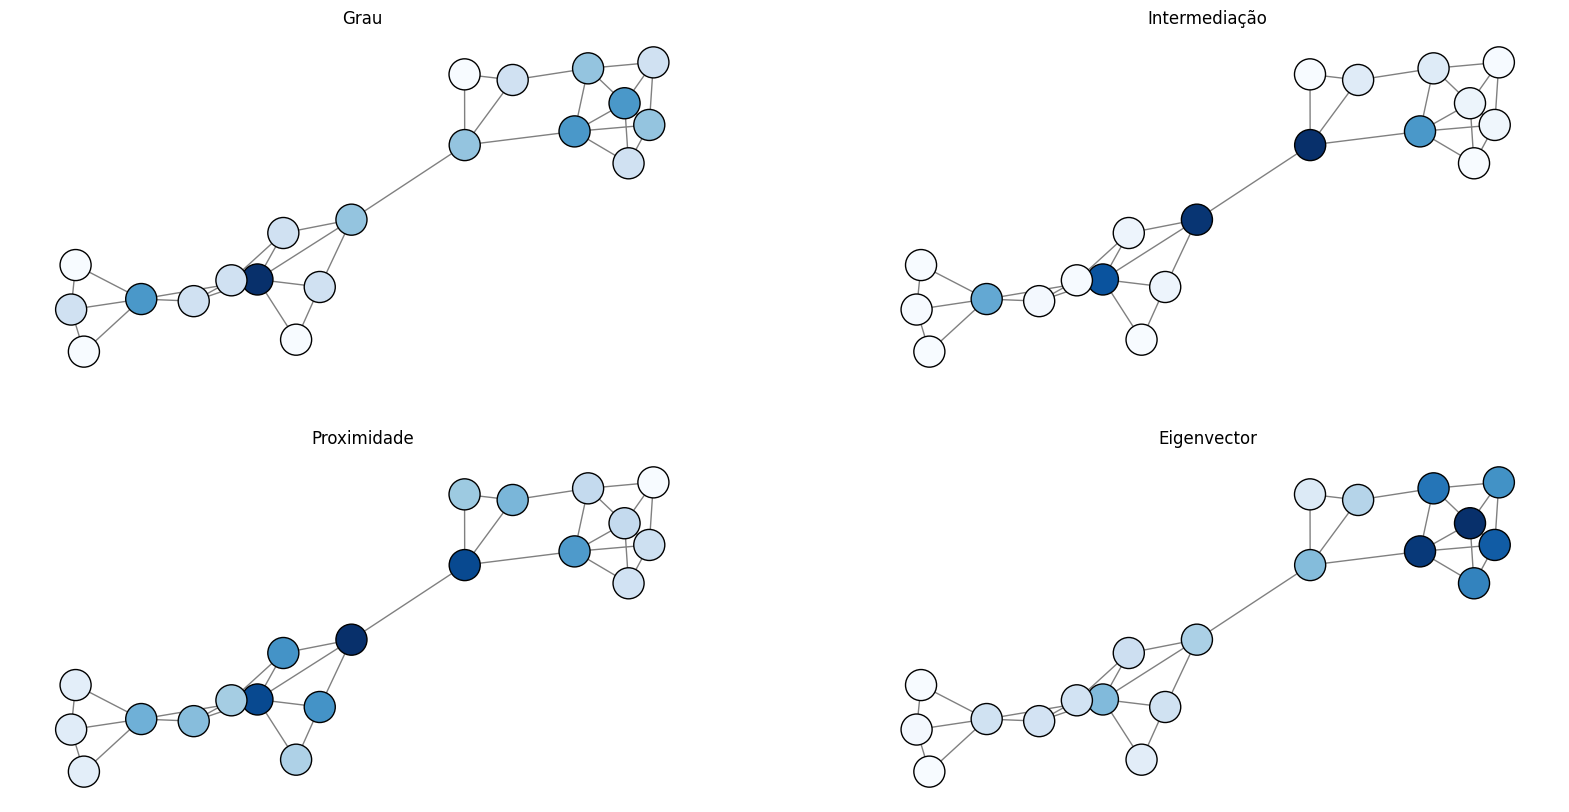

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def centralityMeasures(graph):
  degree = nx.degree_centrality(graph)
  betweenness = nx.betweenness_centrality(graph)
  closeness = nx.closeness_centrality(graph)
  eigenvector = nx.eigenvector_centrality(graph, max_iter=500)

  degree_values = [degree[node] for node in graph.nodes]
  bet_values = [betweenness[node] for node in graph.nodes]
  clos_values = [closeness[node] for node in graph.nodes]
  eigen_values = [eigenvector[node] for node in graph.nodes]

  return degree_values, bet_values, clos_values, eigen_values;

G = nx.Graph()

letras = "abcdefghijklmnopqrst"

for i in range(len(letras)):
  G.add_node(letras[i])

edges = [
    ('a', 'b'), ('a', 'd'), ('a', 'f'),
    ('b', 'd'), ('b', 'e'),('b','g'),
    ('c', 'f'),('c','h',),('c','r'),
    ('d', 'e'), ('d', 'f'), ('d', 'g'),
    ('e', 'g'),
    ('f', 'g'),
    ('g', 'h'),
    ('h', 'i'), ('h', 'r'),
    ('i', 'j'),('i','p'),('i','n'),
    ('j', 'k'), ('j', 'n'), ('j', 'p'),('j','o'),('j','m'),('j','l'),
    ('k', 'l'),('k','p'),
    ('l', 'm'),
    ('m', 'q'),('m','s'),
    ('n','o'),
    ('q', 's'),
    ('t','s'),('t','m')
]

G.add_edges_from(edges)

degree_values, bet_values, clos_values, eigen_values = centralityMeasures(G);

plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G, seed=44)  #Layout para organização

subax1 = plt.subplot(221)
subax1.set_title("Grau")
nx.draw(G, pos, with_labels=False, node_color=degree_values,cmap=plt.cm.Blues, edge_color='gray', node_size=500, font_size=10, edgecolors='black')

subax2 = plt.subplot(222)
subax2.set_title("Intermediação")
nx.draw(G, pos, with_labels=False, node_color=bet_values, cmap=plt.cm.Blues, edge_color='gray', node_size=500, font_size=10, edgecolors='black')

subax3 = plt.subplot(223)
subax3.set_title("Proximidade")
nx.draw(G, pos, with_labels=False, node_color=clos_values, cmap=plt.cm.Blues, edge_color='gray', node_size=500, font_size=10, edgecolors='black')

subax3 = plt.subplot(224)
subax3.set_title("Eigenvector")
nx.draw(G, pos, with_labels=False, node_color=eigen_values, cmap=plt.cm.Blues, edge_color='gray', node_size=500, font_size=10, edgecolors='black')


plt.show()

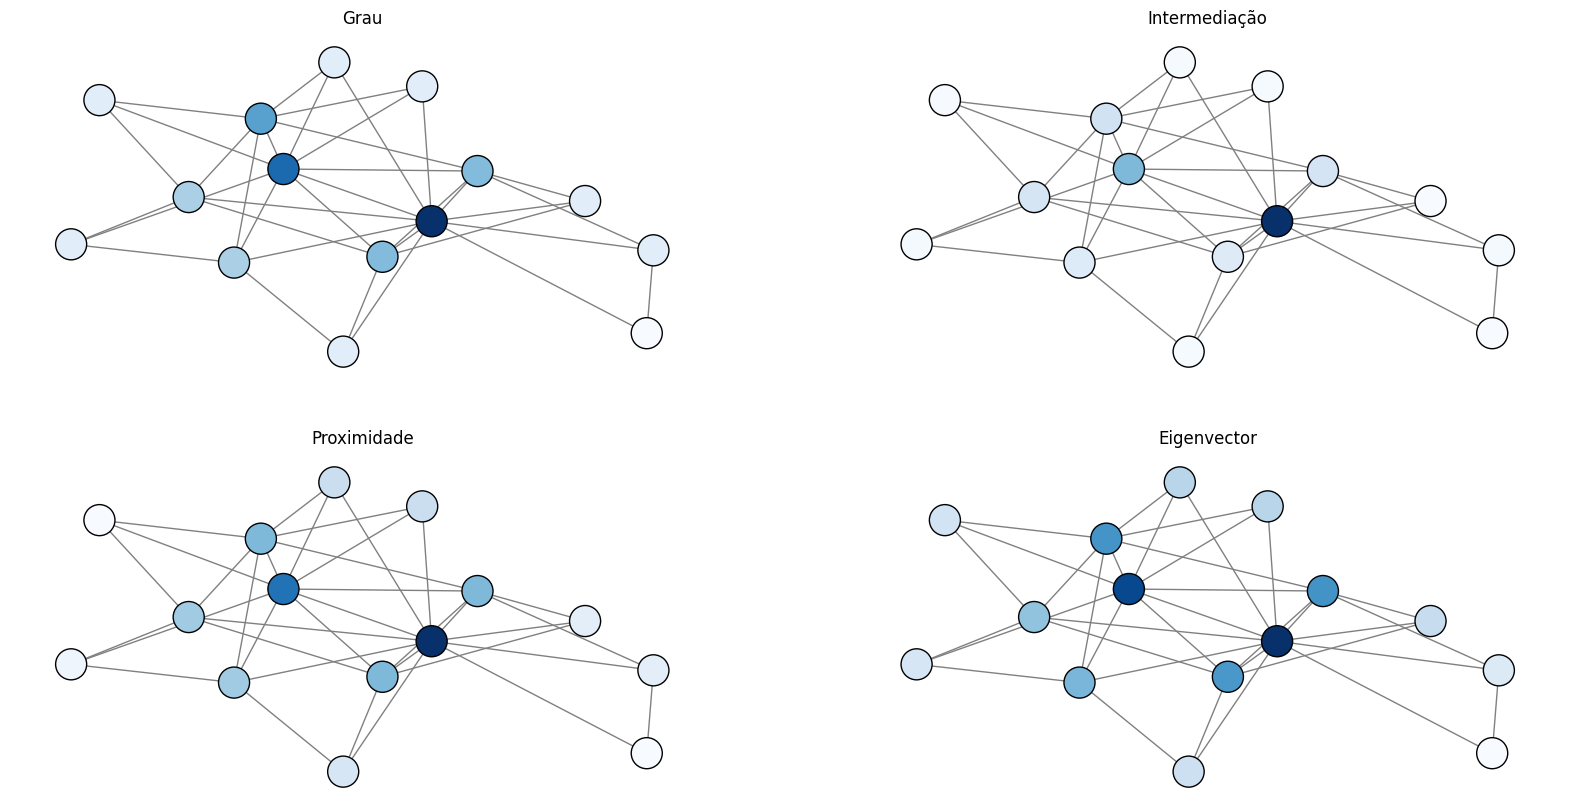

In [ ]:
G = nx.barabasi_albert_graph(15,3)
pos = nx.spring_layout(G, seed=44)

degree_values, bet_values, clos_values, eigen_values = centralityMeasures(G);
drawGraph(G, degree_values, bet_values, clos_values, eigen_values, pos);

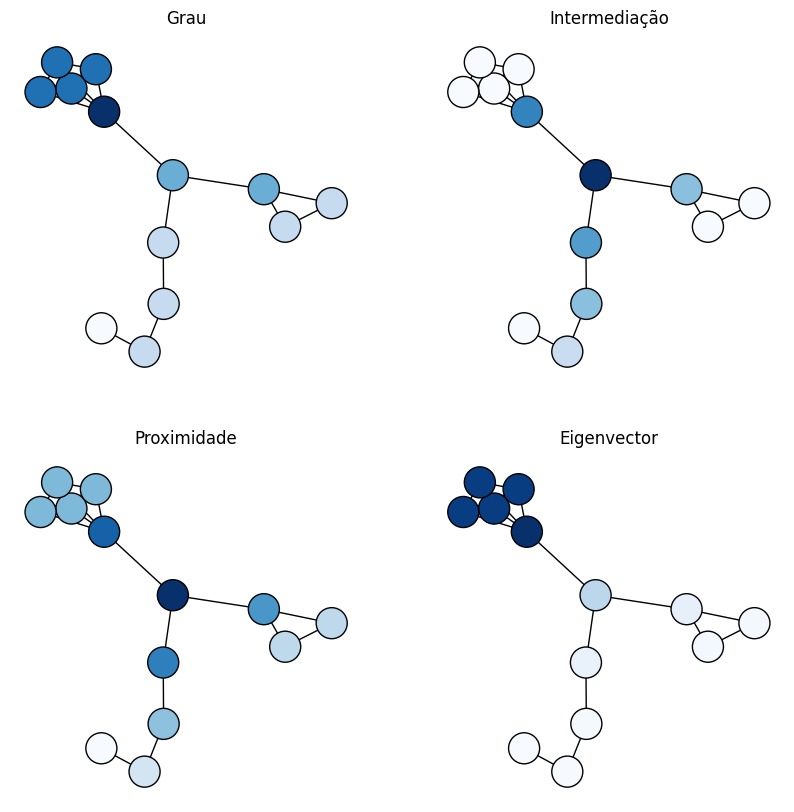

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def centralityMeasures(graph):
  degree = nx.degree_centrality(graph)
  betweenness = nx.betweenness_centrality(graph)
  closeness = nx.closeness_centrality(graph)
  eigenvector = nx.eigenvector_centrality(graph, max_iter=500)

  degree_values = [degree[node] for node in graph.nodes]
  bet_values = [betweenness[node] for node in graph.nodes]
  clos_values = [closeness[node] for node in graph.nodes]
  eigen_values = [eigenvector[node] for node in graph.nodes]

  return degree_values, bet_values, clos_values, eigen_values;

# Criar grafo vazio
G = nx.Graph()

# Adicionar cluster A (5 nós totalmente conectados)
cluster_A = ['A1', 'A2', 'A3', 'A4', 'A5']
G.add_edges_from([(u, v) for idx, u in enumerate(cluster_A) for v in cluster_A[idx + 1:]])

# Adicionar cluster B (3 nós totalmente conectados)
cluster_B = ['B1', 'B2', 'B3']
G.add_edges_from([(u, v) for idx, u in enumerate(cluster_B) for v in cluster_B[idx + 1:]])

# Adicionar cluster C (linear, 4 nóc)
cluster_C = ['C1', 'C2', 'C3', 'C4']
G.add_edges_from([(cluster_C[i], cluster_C[i+1]) for i in range(len(cluster_C)-1)])

# Adicionar hub central
G.add_node('H')

# Conectar hub aos clusters
G.add_edges_from([('H', 'A1'), ('H', 'B1'), ('H', 'C1')])

pos = nx.spring_layout(G, k=0.5, seed=42)
degree_values, bet_values, clos_values, eigen_values = centralityMeasures(G);

# Plot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Grau
axs[0, 0].set_title('Grau')
nx.draw(G, pos, with_labels=False, node_color=degree_values, cmap=plt.cm.Blues, node_size=500, ax=axs[0, 0], edgecolors='black')

# Intermediação
axs[0, 1].set_title('Intermediação')
nx.draw(G, pos, with_labels=False, node_color=bet_values, cmap=plt.cm.Blues, node_size=500, ax=axs[0, 1], edgecolors='black')

# Proximidade
axs[1, 0].set_title('Proximidade')
nx.draw(G, pos, with_labels=False, node_color=clos_values,cmap=plt.cm.Blues, node_size=500, ax=axs[1, 0], edgecolors='black')

# Eigenvector
axs[1, 1].set_title('Eigenvector')
nx.draw(G, pos, with_labels=False, node_color=eigen_values, cmap=plt.cm.Blues, node_size=500, ax=axs[1, 1], edgecolors='black')

plt.show()

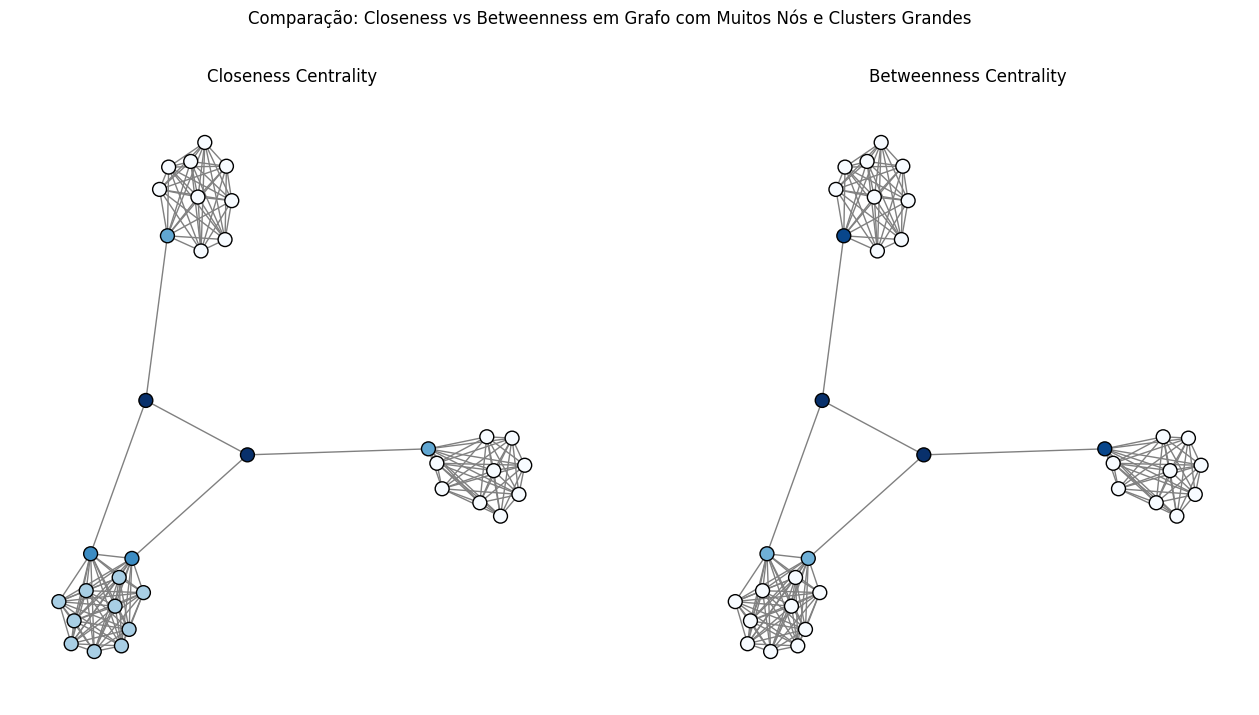

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Criar grafo vazio
G = nx.Graph()

# Função para criar clusters completos
def criar_cluster(prefixo, n):
    return [f"{prefixo}{i}" for i in range(1, n + 1)]

# Criar clusters
cluster_A = criar_cluster("A", 10)
cluster_B = criar_cluster("B", 12)
cluster_C = criar_cluster("C", 10)

# Adicionar conexões internas (completos)
G.add_edges_from([(u, v) for idx, u in enumerate(cluster_A) for v in cluster_A[idx + 1:]])
G.add_edges_from([(u, v) for idx, u in enumerate(cluster_B) for v in cluster_B[idx + 1:]])
G.add_edges_from([(u, v) for idx, u in enumerate(cluster_C) for v in cluster_C[idx + 1:]])

# Criar nós ponte
G.add_node('P1')
G.add_node('P2')

# Conectar os clusters via as pontes
G.add_edge('P1', 'A1')
G.add_edge('P1', 'B1')
G.add_edge('P2', 'B12')
G.add_edge('P2', 'C1')

# Opcional: conectar P1 e P2 entre si (aumenta complexidade)
G.add_edge('P1', 'P2')

# Layout
pos = nx.spring_layout(G, k=0.5, seed=42)

# Calcular centralidades
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)

# Plot comparativo
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Comparação: Closeness vs Betweenness em Grafo com Muitos Nós e Clusters Grandes')

# Closeness
axs[0].set_title('Closeness Centrality')
nx.draw(G, pos, with_labels=False,
        node_color=list(closeness.values()),
        cmap=plt.cm.Blues, node_size=100,
        edge_color='gray', ax=axs[0], edgecolors='black')

# Betweenness
axs[1].set_title('Betweenness Centrality')
nx.draw(G, pos, with_labels=False,
        node_color=list(betweenness.values()),
        cmap=plt.cm.Blues, node_size=100,
        edge_color='gray', ax=axs[1], edgecolors='black')

plt.show()

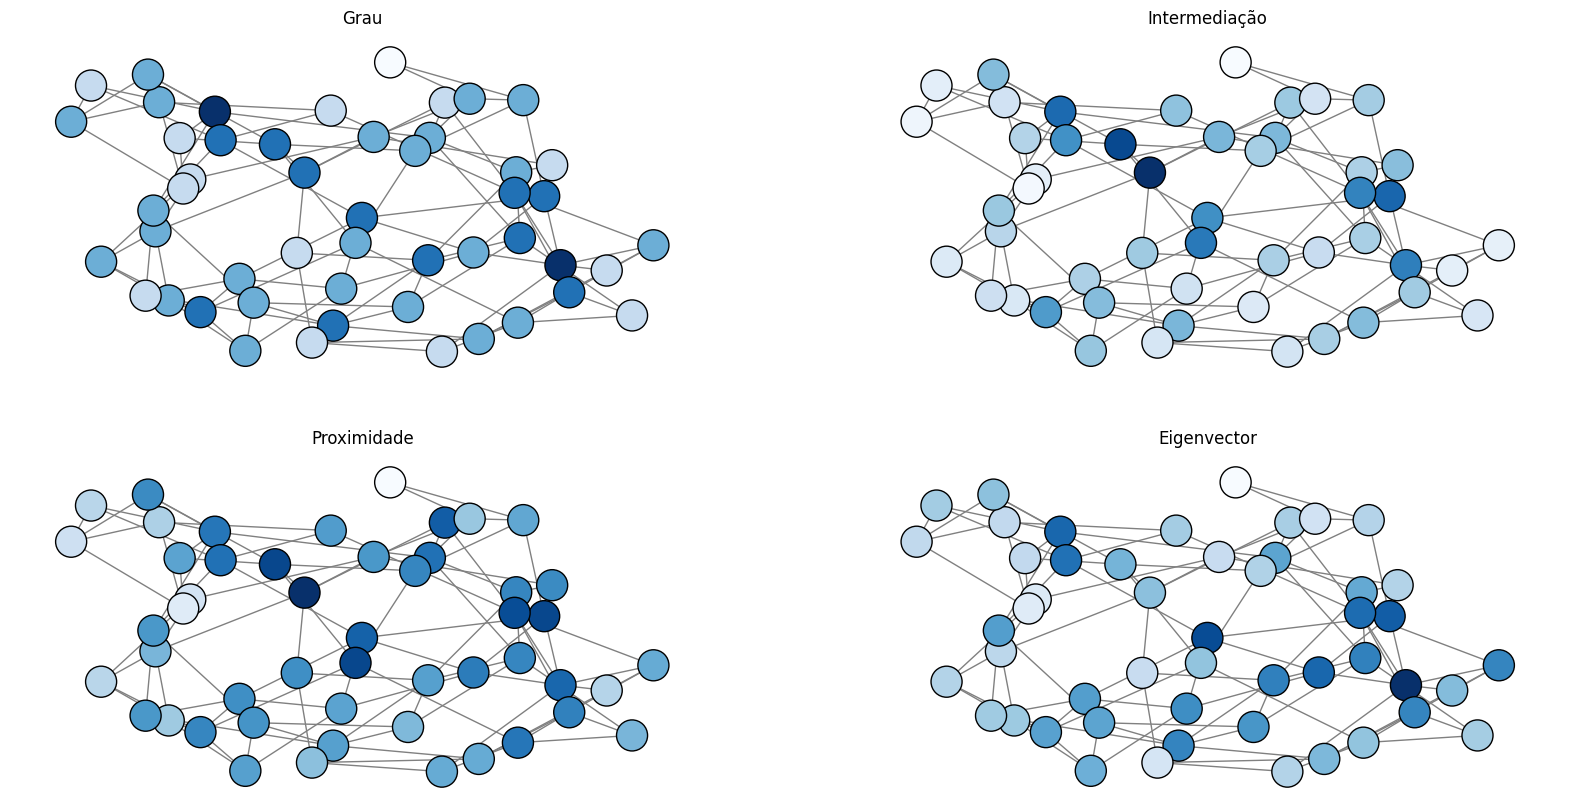

In [ ]:
G = nx.watts_strogatz_graph(50, 4, 0.2)

pos = nx.spring_layout(G, k=0.5,seed=44)

degree_values, bet_values, clos_values, eigen_values = centralityMeasures(G);
drawGraph(G, degree_values, bet_values, clos_values, eigen_values, pos);